In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math


# Data pre-processing

In [11]:
df = pd.read_csv('../data/df_formatted.csv')
df.dtypes

df_num = df[['Satisfaction_Level','Last_Evaluation',
            'Average_Montly_Hours',
             'Time_Spend_Company','Number_Projects']]
df_num.dtypes


Satisfaction_Level      float64
Last_Evaluation         float64
Average_Montly_Hours      int64
Time_Spend_Company        int64
Number_Projects           int64
dtype: object

## Data standardization

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_mmax = pd.DataFrame(min_max_scaler.fit_transform(df_num.values.astype(float)))
df_mmax.columns = df_num.columns

from sklearn.preprocessing import StandardScaler

df_z = StandardScaler().fit_transform(df_num.values)
df_z = pd.DataFrame(df_z)
df_z.columns = df_num.columns

# quale normalizzazione utilizzare? proseguo con quella standard
data = df_z 
data.head()

,Satisfaction_Level,Last_Evaluation,Average_Montly_Hours,Time_Spend_Company,Number_Projects
0,-0.936495,-1.087275,-0.882040,-0.341235,-1.462863
1,0.752814,0.840707,1.220423,1.713436,0.971113
2,-2.022479,0.957554,1.420657,0.343655,2.593763
3,0.431041,0.899131,0.439508,1.028546,0.971113
4,-0.976716,-1.145699,-0.841993,-0.341235,-1.462863


In [13]:
# Scelta di un intervallo per eps e MinPts tramite k-NN

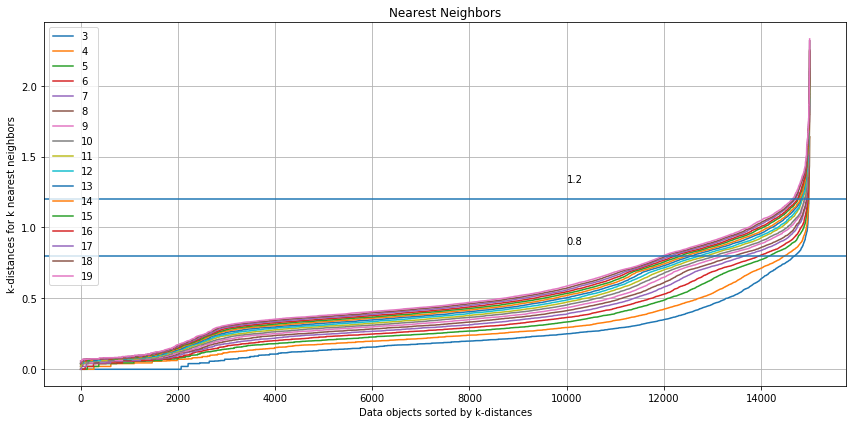

In [14]:

from sklearn.neighbors import NearestNeighbors

# grafico k-nearest-neighbors
plt.close()
plt.figure(figsize=(12,6))

# k =  numero di vicinik = 4

for k in range(3,20,1): 
#for k in [3,5,7,10,100]:

    # applico l'algoritmo k-NN con distanza euclidea e k-MinPts
    nbrs = NearestNeighbors(n_neighbors=k, metric='minkowski', p=2).fit(data.values) 

    # estraggo la matrice delle distanze, ogni colonna rappresenta le distanze dal k-esimo vicino
    # l'ultima colonna è dunque la distanza che ci interessa
    Mdistances = nbrs.kneighbors(data.values)[0]


    df_kdist = pd.DataFrame(Mdistances) # converto la matrice delle distanze in DataFrame
    df_kdist.columns = [str(i) for i in range(1,k+1)] #rinomino le colonne
    df_kdist = df_kdist.sort_values(str(k)) # metto in ordine di distanza
    kdist = df_kdist[str(k)] # seleziono massima distanza tra i k-vicini

    x=np.arange(1,15000,1)
    y= kdist

    plt.plot(x,y)
    plt.title('Nearest Neighbors')
    plt.ylabel('k-distances for k nearest neighbors')
    plt.xlabel('Data objects sorted by k-distances')
    plt.legend(loc=2)
    plt.tight_layout()

# linee orizzontali per intervallo eps    
lista_h = [0.8,1.2]
for h in lista_h:
    plt.annotate(str(h),xy=(10000,h*1.1))
    plt.axhline(h)


plt.grid()
plt.savefig('../images/dbscan/nearestneighbors.pdf')    

# Prova DBSCAN

In [15]:
from sklearn.cluster import DBSCAN
eps = 0.9
MinPts =6

out = DBSCAN(eps=eps,min_samples = MinPts,metric='euclidean',
                     algorithm='auto',n_jobs=-1).fit(data)
labels = out.labels_

Dlabels = pd.DataFrame(labels)

# numero di clusters
Ncluster =max(labels)+1 ## numero di cluster senza considerare il rumore, poichè le labels vanno da 0 in avanti, -1 per il rumore
Ncluster


4

# DBSCAN

Prova a cambiare i valori di eps e MinPts in base all'intervallo di k-NN,
con variazioni piccole di almeno 0.02, puoi utilizzare anche np.linspace suddividendo l'intervallo in modo continuo
nel numero di punti che vuoi
ad esempio suddivido l'intervallo 0.5-1 in 10 valori:


In [16]:
iter_eps = np.linspace(0.5,1.0,10)
iter_eps

array([ 0.5       ,  0.55555556,  0.61111111,  0.66666667,  0.72222222,
        0.77777778,  0.83333333,  0.88888889,  0.94444444,  1.        ])

Per provare i valori nell'intervallo che vuoi una possibilità è fare un doppio for con Minpts e Eps, ad esempio:

In [18]:
range_eps = np.linspace(0.8,1.0,10) 
range_MinPts = range(4,20,1)

###########################################################
for MinPts in range_MinPts:
    for eps in range_eps:
        print("eps:{} , Minpts:{}".format(round(eps,3),MinPts))
        
        """ codice per DBSCAN 
        dove tirar fuori 
- numero di cluster
- silhouette (calcolare la silhouette è dispendioso, ci vuole molto tempo, quindi forse prima conviene guardare il numero di cluster)
"""
        

eps:0.8 , Minpts:4
eps:0.822 , Minpts:4
eps:0.844 , Minpts:4
eps:0.867 , Minpts:4
eps:0.889 , Minpts:4
eps:0.911 , Minpts:4
eps:0.933 , Minpts:4
eps:0.956 , Minpts:4
eps:0.978 , Minpts:4
eps:1.0 , Minpts:4
eps:0.8 , Minpts:5
eps:0.822 , Minpts:5
eps:0.844 , Minpts:5
eps:0.867 , Minpts:5
eps:0.889 , Minpts:5
eps:0.911 , Minpts:5
eps:0.933 , Minpts:5
eps:0.956 , Minpts:5
eps:0.978 , Minpts:5
eps:1.0 , Minpts:5
eps:0.8 , Minpts:6
eps:0.822 , Minpts:6
eps:0.844 , Minpts:6
eps:0.867 , Minpts:6
eps:0.889 , Minpts:6
eps:0.911 , Minpts:6
eps:0.933 , Minpts:6
eps:0.956 , Minpts:6
eps:0.978 , Minpts:6
eps:1.0 , Minpts:6
eps:0.8 , Minpts:7
eps:0.822 , Minpts:7
eps:0.844 , Minpts:7
eps:0.867 , Minpts:7
eps:0.889 , Minpts:7
eps:0.911 , Minpts:7
eps:0.933 , Minpts:7
eps:0.956 , Minpts:7
eps:0.978 , Minpts:7
eps:1.0 , Minpts:7
eps:0.8 , Minpts:8
eps:0.822 , Minpts:8
eps:0.844 , Minpts:8
eps:0.867 , Minpts:8
eps:0.889 , Minpts:8
eps:0.911 , Minpts:8
eps:0.933 , Minpts:8
eps:0.956 , Minpts:8
eps:0.978 